### Big Mac Index Visualization

This project aims to create an interactive dashboard to showcase the Big Mac Index around the world. The data is provided and maintained by The Economist for open source use. 

This is a tutorial for me to dive into the world of dashboarding using python visualization packages. 

Before we enter the dashboarding world, lets do a quick explatory visualization analysis on the data we have, using some of our favourite visualization tools such as MatPlotLib and Seaborn.

In [2]:
#Importing the required tools: 

import pandas as pd

#Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#Interactive Visualization Tools



In [6]:
#Will use the raw data since it has the biggest history of prices
df = pd.read_csv('data/output-data/big-mac-raw-index.csv')

In [8]:
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,-0.004,0.050,-0.167,-0.099,1.091
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,-0.386,-0.352,-0.486,-0.444,0.289
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,-0.343,-0.308,-0.451,-0.406,0.378
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,0.196,0.261,0.000,0.082,1.511
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,-0.228,-0.186,-0.354,-0.301,0.622


In [12]:
#Lets drop a few columns such as iso_a3, currency_code, local_price, dollar_ex, USD, EUR, GBP, JPY, CNY
#For now lets just keep this very very simple

df = df.drop(['iso_a3','currency_code','local_price','dollar_ex','USD','EUR','GBP','JPY','CNY'], axis = 1)

In [14]:
#Ahhh nice, as you can see its much simpler
df.head()

,date,name,dollar_price
0,2000-04-01,Argentina,2.500000
1,2000-04-01,Australia,1.541667
2,2000-04-01,Brazil,1.648045
3,2000-04-01,Britain,3.002000
4,2000-04-01,Canada,1.938776


In [18]:

len(df)
#1274 rows

1274

In [23]:
#Lets see how many countries are being tracked

print(len(list(df['name'].unique())))
print(list(df['name'].unique()))

#alright cool, 57 unique countries are being tracked for this Big Mac Index

57
['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile', 'China', 'Czech Republic', 'Denmark', 'Euro area', 'Hong Kong', 'Hungary', 'Indonesia', 'Israel', 'Japan', 'Malaysia', 'Mexico', 'New Zealand', 'Poland', 'Russia', 'Singapore', 'South Africa', 'South Korea', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'United States', 'Philippines', 'Norway', 'Peru', 'Turkey', 'Egypt', 'Colombia', 'Costa Rica', 'Pakistan', 'Saudi Arabia', 'Sri Lanka', 'Ukraine', 'Uruguay', 'UAE', 'India', 'Vietnam', 'Azerbaijan', 'Bahrain', 'Croatia', 'Guatemala', 'Honduras', 'Jordan', 'Kuwait', 'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania', 'United Arab Emirates']


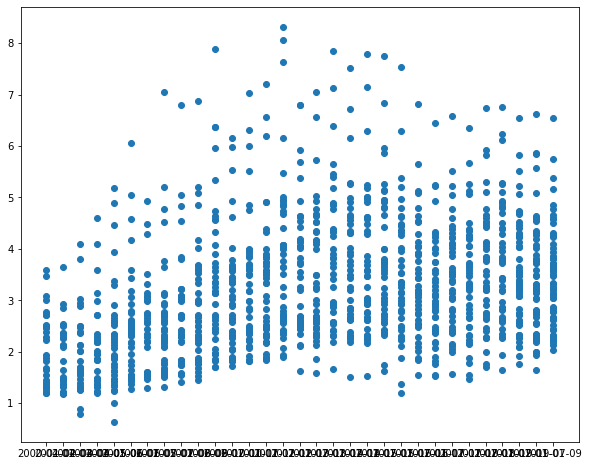

In [26]:
#Lets create a scatter plot to visualize the change in prices over time, disregard the type of country. 
#Hypthoesis, should be going up gradually over the years

#MatPlotLib Version
plt.figure(figsize = (10,8))
plt.scatter(df['date'],df['dollar_price'])
plt.show()

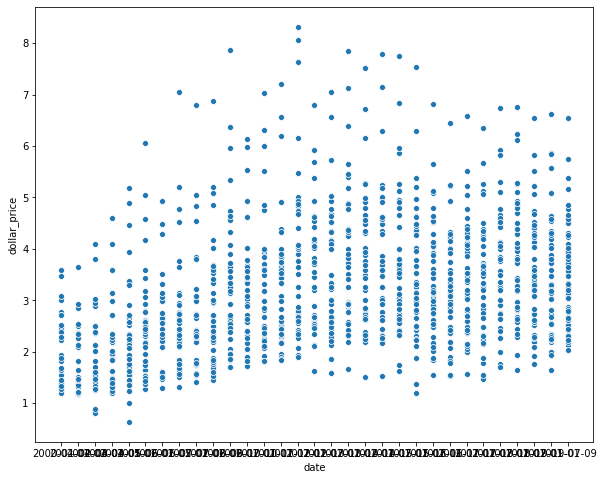

In [29]:
#Seaborn Version
plt.figure(figsize = (10,8))
sns.scatterplot(df['date'],df['dollar_price'])

#as you can see very similar, seaborn I would say has more built in easier to use stylistic stuff over matplotlib

### Let's make a nice interactive plot that has a few things:

1.) A slider or drop down that changes the country we are viewing

2.) Show the Price changes over time

3.) Stylistic features

In [36]:
#Lets start with Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource


In [38]:
source = ColumnDataSource(df)

#general format
output_file = ('test.html')
p = figure()
p.scatter('date','dollar_price', source = source,
         fill_alpha=0.4, size=12)
show(p) #will lead to an html file